In [30]:
from langgraph.graph import StateGraph
from typing import TypedDict, List, Optional

In [38]:
class AgentState(TypedDict):
    name: Optional[str]
    age: int
    final: str
    # name = 'first'

In [39]:
def first_node(state:AgentState):
    """This is the first node of the sequence"""

    state['final'] = f'Hi {state['name']}'
    return state

def second_node(state:AgentState):
    """This is the second node of the sequence"""

    state['final'] += f' you are {state['age']} years old'
    return state

In [40]:


mygraph = StateGraph(AgentState)
mygraph.add_node('first_node',first_node)
mygraph.add_node('second_node',second_node)
mygraph.set_entry_point('first_node')
mygraph.set_finish_point('second_node')
mygraph.add_edge('first_node','second_node')
app = mygraph.compile()
# mygraph.invoke()

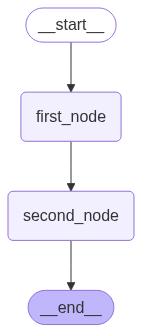

In [23]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png(),height=500))

In [43]:
result = app.invoke({'name': '', 'age': 21})

In [44]:
print(result['final'])

Hi  you are 21 years old


Conditional Edges


In [45]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [49]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    operation : str
    finalnumber :int

In [67]:
def addition_func(state:AgentState):
    """this is the addition nod"""
    state['finalnumber'] = state['number1'] + state['number2']
    return state
def subtraction_func(state:AgentState):
    '''this is the subtraction node
    '''
    state['finalnumber'] = state['number1'] - state['number2']
    return state
def router_next_node_func(state:AgentState):
    """this is the router node"""
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'

In [68]:
graph = StateGraph(AgentState)

graph.add_node('router', lambda state: state)
graph.add_node('addition_node', addition_func )
graph.add_node('subtraction_node', subtraction_func)
graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    router_next_node_func,
    {
        'addition_operation':'addition_node',
        'subtraction_operatation': 'subtraction_node'
    }
)
graph.add_edge('addition_node',END)
graph.add_edge('subtraction_node',END)
graph= graph.compile()

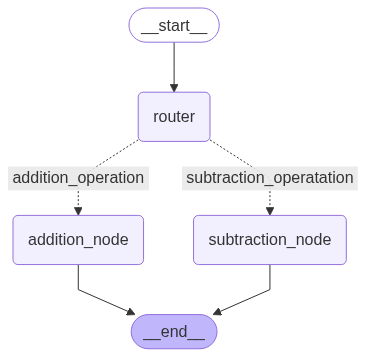

In [69]:
# from Ipython.display import display, Image
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [70]:
ans1 = graph.invoke({'number1':1, 'number2': 10, 'operation': '+'})

In [71]:
print(ans1)

{'number1': 1, 'number2': 10, 'operation': '+', 'finalnumber': 11}
